> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDB Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The database under this study is collected from The Movie Database (Imdb) with data of 10,000 movies:
Questions I would like to ask are:

What genres are the most popular among the movies made?

- Which genres are most popular from year to year? 
- What kinds of properties are associated with movies that have high revenues?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#check for null values and datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see that the data contains 21 columns and 10866 rows. Columns with less than 10866 rows indicate that these contains null values. In particular, columns such as homepage, tagline, keywords have a large number of null values. Meaning that we can't use them as a base to remove rows with null values because doing so would result in a huge loss in data. Besides, these columns do not seem to be useful to answer our questions so we can consider removing them later on.
In regards to data type, release_data need to be converted to datetime instead of string.
Lastly, genres column appear to be multivalued. Since one of our research questions require finding out which genres are the most popular, we will need to separate them into single values by the "|" 

In [6]:
#check for value ranges and statistics of the data in order to looks for errorneous values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Errorneous values can be seen in budget, revenue, runtime, budget_adj and revenue_adj as they are all zeros for min, 25% and 50% which do not make sense. We can consider dropping these rows in the next section


### Data Cleaning

Below are the steps to handle rows with null values, wrong data types and errorneous values

In this section, I will remove rows with null values, wrong datatype and erroneous values
1. Remove columns that are not needed for the analysis
2. Remove errorneous rows containing 0 in budget_adj and revenue_adj
3. Convert data type of release date to date
4. Handle multivalued genres column

1. Remove column ts that are not needed for the analysis

In [7]:
df.drop(['tagline','imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies'],axis = 1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


now we have 13 columns and 10866 rows

2. Remove errorneous rows containing 0 in budget and revenue

Seeing that we have budget, revenue and budget_adj,revenue_adj, I would prefer to use budget_adj,revenue_adj as these would be more accurate representation of what the actual cost and revenue was. The logical next step would be to remove budget and revenue and keep the adj versions. However, it should be better to keep the columns with less zeros since we don't want to lose too much data
Let's see which ones has more zeroes

In [9]:
#counting rows with zeros in budget
df.query('budget == 0').budget.count()

5696

In [10]:
#counting rows with zeros in budget_adj
df.query('budget_adj == 0').budget.count()

5696

In [11]:
#counting rows with zeros in revenue
df.query('revenue == 0').budget.count()

6016

In [12]:
#counting rows with zeros in revenue_adj
df.query('revenue_adj == 0').budget.count()

6016

Looks like both the normal and adj version have the same number of zeroes. We can now safely remove budget and revenue columns

In [13]:
df.drop(['budget','revenue'],axis = 1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 933.9+ KB


Now let's remove rows containing zeroes in revenue_adj and budget_adj

In [15]:
#drop budget and revenue rows that have 0
df.drop(df[(df.revenue_adj==0)|(df.budget_adj==0)].index,axis = 0, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
id                3855 non-null int64
popularity        3855 non-null float64
original_title    3855 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 361.4+ KB


Now we have 3855 rows with no null values and errorneous values anymore

In [18]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


3. Convert data type of release date to date

The release_date is an object datatype so we need to convert to date time

In [19]:
df['release_date']=pd.to_datetime(df['release_date'],format ='%m/%d/%y')

In [20]:
#check data_type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
id                3855 non-null int64
popularity        3855 non-null float64
original_title    3855 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null datetime64[ns]
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 361.4+ KB


Since we have the release_year column, let's confirm if the year that we just convert matches

In [21]:
(df['release_date'].dt.year == df['release_year']).all()

False

Let's investigate to see why this happens

In [87]:
df.query('release_date.dt.year != release_year')

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,62,3.309196,2001: A Space Odyssey,149,Science Fiction|Mystery|Adventure,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
9720,871,1.152937,Planet of the Apes,112,Adventure|Science Fiction|Mystery,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
9724,916,0.786854,Bullitt,113,Action|Crime|Drama|Thriller,2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08
9727,805,0.724527,Rosemary's Baby,136,Horror|Drama|Mystery,2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08
9729,17917,0.633129,Oliver!,153,Drama|Family|Music,2068-09-26,42,6.2,1968,6.268964e+07,1.053186e+08
9730,4929,0.621202,Hang 'em High,114,Western,2068-07-31,86,6.3,1968,1.128413e+07,4.262895e+07
9731,11046,0.569422,Where Eagles Dare,155,Adventure|Drama|Action|History|War,2068-12-04,116,6.9,1968,4.827102e+07,1.316482e+08
9737,22377,0.378658,The Green Berets,142,War|Drama,2068-07-04,17,5.6,1968,4.388275e+07,6.895860e+07
9756,29146,0.045242,Charly,103,Drama|Romance|Science Fiction,2068-09-23,13,6.0,1968,5.955515e+06,5.107112e+06
9849,646,3.170651,Dr. No,110,Adventure|Action|Thriller,2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08


It looks like any date from year 1968 and before that will be converted to year 20xx. There are 67 rows in total with this problem. Let's fix it by using the year from the release year instead

In [22]:
# Create a temp variable to hold the correct value
temp = pd.to_datetime({'year': df['release_year'], 'month': df['release_date'].dt.month, 'day': df['release_date'].dt.day})

In [23]:
#Assign temp to release date
df['release_date']=temp

In [24]:
#Check the matching again
(df['release_date'].dt.year == df['release_year']).all()

True

4.Handle multivalued genres column

In [29]:
#new data frame with split value columns, preserving id column for merging later on
genre_list = df.set_index('id')['genres'].str.split("|",expand=True)
genre_list.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [30]:
genre_list.shape

(3855, 5)

Looks like there's a maximum of 5 genres

In [31]:
#stack results of the split into an index instead of column
genre_list.stack().head(10)

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
262500  0          Adventure
        1    Science Fiction
dtype: object

In [34]:
#remove the second index [0 1 2 3 4] 
new_genre_list = genre_list.stack().reset_index(1,drop = True).reset_index(name = 'genre')
new_genre_list.head(10)

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
5,76341,Adventure
6,76341,Science Fiction
7,76341,Thriller
8,262500,Adventure
9,262500,Science Fiction


In [35]:
#merge the new_genre_list with the original dataframe
df_final = pd.merge(df,new_genre_list,on = 'id',how = 'inner')
df_final.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [36]:
#drop the orignal genres column
df_final.drop('genres',axis = 1,inplace=True)
df_final

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
5,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
6,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
7,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
8,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
9,262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [37]:
#check the info of the new dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10318 entries, 0 to 10317
Data columns (total 11 columns):
id                10318 non-null int64
popularity        10318 non-null float64
original_title    10318 non-null object
runtime           10318 non-null int64
release_date      10318 non-null datetime64[ns]
vote_count        10318 non-null int64
vote_average      10318 non-null float64
release_year      10318 non-null int64
budget_adj        10318 non-null float64
revenue_adj       10318 non-null float64
genre             10318 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 967.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Which genres are most popular from year to year?

In [38]:
#Review how df_final looks like
df_final.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


Looking at the dataframe above. We can determine which is the most popular genres year by year by looking at the genres with the highest popularity rating each year. To do this, we need to arrange the data by the following steps

In [41]:
#sorting the dataframe by popularity and release_year
df_popular = df_final.sort_values(['release_year','popularity'],ascending=[True,False])
df_popular.head(10)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
9734,539,2.610362,Psycho,109,1960-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08,Drama
9735,539,2.610362,Psycho,109,1960-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08,Horror
9736,539,2.610362,Psycho,109,1960-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08,Thriller
9737,966,1.872132,The Magnificent Seven,128,1960-10-23,224,7.0,1960,1.474593e+07,3.616441e+07,Action
9738,966,1.872132,The Magnificent Seven,128,1960-10-23,224,7.0,1960,1.474593e+07,3.616441e+07,Adventure
9739,966,1.872132,The Magnificent Seven,128,1960-10-23,224,7.0,1960,1.474593e+07,3.616441e+07,Western
9740,967,1.136943,Spartacus,197,1960-10-06,211,6.9,1960,8.847561e+07,4.423780e+08,Action
9741,967,1.136943,Spartacus,197,1960-10-06,211,6.9,1960,8.847561e+07,4.423780e+08,Drama
9742,967,1.136943,Spartacus,197,1960-10-06,211,6.9,1960,8.847561e+07,4.423780e+08,History
9743,284,0.947307,The Apartment,125,1960-06-15,235,7.9,1960,2.211890e+07,1.843242e+08,Comedy


Since the above dataframe has been sorted. We know that the first row of each year represent be the most popular genre in that year

In [43]:
#Group the data by release_year, showing only the first row
genre_by_year = df_popular.groupby('release_year').genre.first()
genre_by_year.reset_index(name = 'genre')

,release_year,genre
0,1960,Drama
1,1961,Adventure
2,1962,Adventure
3,1963,Action
4,1964,Adventure
5,1965,Adventure
6,1966,Drama
7,1967,Family
8,1968,Science Fiction
9,1969,Adventure


The above represent the most popular genres year by year. Let's see what's the most popular ones across the period

In [44]:
#counting which genre go repeated the most
popular_genre = genre_by_year.reset_index(name = 'genre').genre.value_counts()
popular_genre

Adventure          17
Action             10
Drama               8
Science Fiction     5
Animation           4
Crime               3
Horror              2
Romance             2
Family              1
Thriller            1
Comedy              1
Music               1
Fantasy             1
Name: genre, dtype: int64

The most common genre across the years are Adventure, followed by Action and Drama

### Research Question 2  : What kinds of properties are associated with movies that have high revenues?

In [46]:
#Reviewing the dataframe
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
df_final.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


Attributes that we can study from the above dataframes "df" and "df_final" are:

popularity, runtime, vote_count, vote_average and genre

Since df_final was created to determine the most popular genre, we will use the original dataframe (df) to analyse on the other attributes



In [50]:
#revenue range
df.revenue_adj.describe()

count    3.855000e+03
mean     1.370294e+08
std      2.160944e+08
min      2.370705e+00
25%      1.834123e+07
50%      6.171861e+07
75%      1.632401e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [53]:
#bin edges for revenue range from min to max according to the table above
bin_edges = [2.370705e+00,1.834123e+07,6.171861e+07,1.632401e+08,2.827124e+09]
#Labels the bin for 5 different groups
bin_labels = ['Low','Medium','High','Very High']

In [54]:
#create  revenue_levels for the df
df['revenue_levels'] = pd.cut(df['revenue_adj'],bin_edges,labels=bin_labels)
df

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_levels
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Very High
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Very High
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Very High
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Very High
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Very High
5,281957,9.110700,The Revenant,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,Very High
6,87101,8.654359,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,Very High
7,286217,7.667400,The Martian,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,Very High
8,211672,7.404165,Minions,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,Very High
9,150540,6.326804,Inside Out,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,Very High


In [74]:
#check the attributes of very high revenue movies, excluding genres
df[['runtime','vote_count','vote_average','popularity','budget_adj','revenue_adj','revenue_levels']].query("revenue_levels == 'Very High'").describe()

,runtime,vote_count,vote_average,popularity,budget_adj,revenue_adj
count,964.000000,964.000000,964.000000,964.000000,9.640000e+02,9.640000e+02
mean,117.661826,1291.208506,6.459232,2.249021,8.699208e+07,4.026172e+08
std,22.871163,1352.573788,0.710818,2.337043,5.664831e+07,2.948782e+08
min,74.000000,13.000000,4.200000,0.131526,2.248029e+02,1.632752e+08
25%,100.000000,367.000000,6.000000,1.055439,4.261977e+07,2.133481e+08
50%,115.000000,803.000000,6.400000,1.638246,7.755184e+07,3.059925e+08
75%,130.000000,1750.250000,7.000000,2.642561,1.211748e+08,4.852349e+08
max,248.000000,9767.000000,8.300000,32.985763,3.683713e+08,2.827124e+09


Looking at the above tables we can see that "Very High" revenue movies have the following attributes:
- mean runtime is 117 mins
- mean average vote is 6.459
- mean popularity is 2.249
- mean budget_adj is $87 mil


In [78]:
#check the attributes of all revenue levels
df.groupby('revenue_levels')['runtime','vote_count','vote_average','popularity','budget_adj','revenue_adj'].mean()

,runtime,vote_count,vote_average,popularity,budget_adj,revenue_adj
revenue_levels,,,,,,
Low,103.209544,121.235477,5.956743,0.559655,1.601322e+07,6.486614e+06
Medium,106.407061,249.357217,6.065524,0.805475,2.947233e+07,3.689228e+07
High,109.581950,448.357884,6.189834,1.151047,4.445225e+07,1.020176e+08
Very High,117.661826,1291.208506,6.459232,2.249021,8.699208e+07,4.026172e+08


We can see that all four attributes increase as revenue_levels rise as well, which indicates their positive relationships with revenue_levels

Text(0, 0.5, 'Average Runtime')

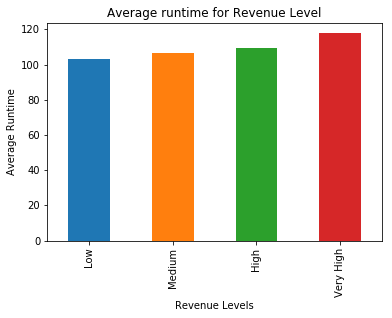

In [86]:
#bar plot for mean runtime
df_runtime = df.groupby('revenue_levels').runtime.mean()
df_runtime.plot(kind = 'bar', title = 'Average runtime for Revenue Level')
plt.xlabel('Revenue Levels')
plt.ylabel('Average Runtime')

The above graph confirms that the higher the runtime, the higher the movie revenue

Text(0, 0.5, 'Average Vote Count')

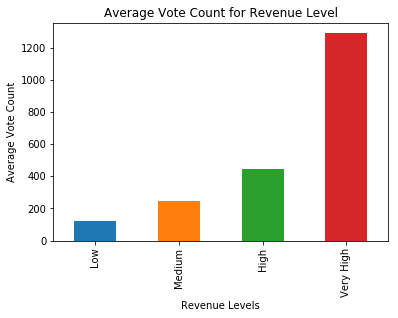

In [87]:
#bar plot for mean vote_count
df_vote_count = df.groupby('revenue_levels').vote_count.mean()
df_vote_count.plot(kind = 'bar', title = 'Average Vote Count for Revenue Level')
plt.xlabel('Revenue Levels')
plt.ylabel('Average Vote Count')

The higher the vote count, the higher the movie revenue

Text(0, 0.5, 'Mean Vote Count')

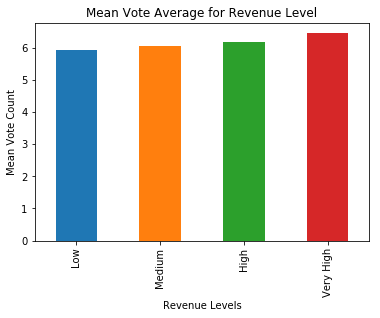

In [88]:
#bar plot for mean vote_average
df_vote_avg = df.groupby('revenue_levels').vote_average.mean()
df_vote_avg.plot(kind = 'bar', title = 'Mean Vote Average for Revenue Level')
plt.xlabel('Revenue Levels')
plt.ylabel('Mean Vote Count')

The higher the average vote count, the higher the movie revenue

Text(0, 0.5, 'Average Popularity')

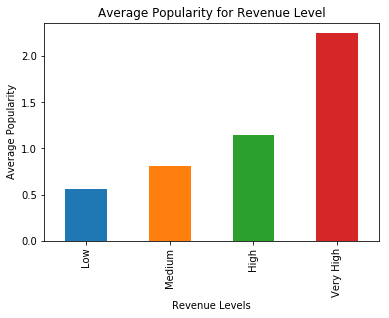

In [91]:
#bar plot for mean popularity
df_popularity = df.groupby('revenue_levels').popularity.mean()
df_popularity.plot(kind = 'bar', title = 'Average Popularity for Revenue Level')
plt.xlabel('Revenue Levels')
plt.ylabel('Average Popularity')

The higher the popularity, the higher the movie revenue

And lastly, we will be looking at budget_adj

Text(0, 0.5, 'Average Budget')

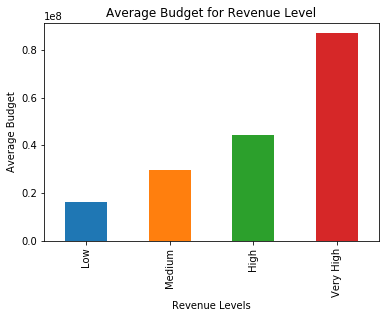

In [93]:
#bar plot for mean budget_adj
df_budget = df.groupby('revenue_levels').budget_adj.mean()
df_budget.plot(kind = 'bar', title = 'Average Budget for Revenue Level')
plt.xlabel('Revenue Levels')
plt.ylabel('Average Budget')

And again, same trend as the previous attributes

It can be seen that vote_count, popularity and budget has the biggest difference the revenue levels, most notably between high and very high ones
Let's look at the scatter plots to check for the correlation with revenue_adj


Text(0, 0.5, 'Average Budget')

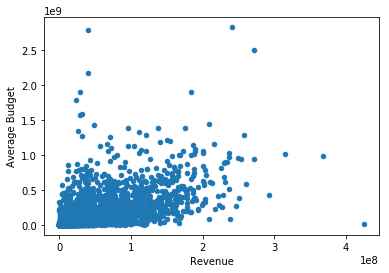

In [97]:
df.plot(y='revenue_adj',x='budget_adj',kind = 'scatter')
plt.xlabel('Revenue')
plt.ylabel('Average Budget')

Text(0, 0.5, 'vote_count')

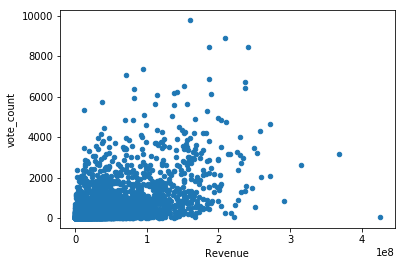

In [98]:
df.plot(y='vote_count',x='budget_adj',kind = 'scatter')
plt.xlabel('Revenue')
plt.ylabel('vote_count')

Text(0, 0.5, 'popularity')

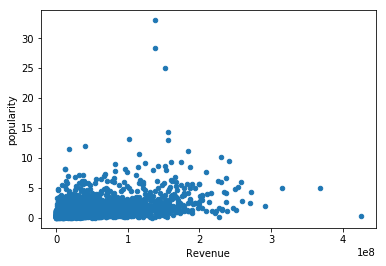

In [99]:
df.plot(y='popularity',x='budget_adj',kind = 'scatter')
plt.xlabel('Revenue')
plt.ylabel('popularity')

Looking at the above scatter plot we see a very slight upward trend between revenue_adj and other 3 attributes. Let's confirm this by calculating the correlations


In [105]:
print('Correlation for:')
print("Revenue_adj vs Budget Adj is: ",df['revenue_adj'].corr(df['budget_adj']))
print("Revenue_adj vs Vote Count is: ",df['vote_count'].corr(df['budget_adj']))
print("Revenue_adj vs Popularity is: ",df['popularity'].corr(df['budget_adj']))

Correlation for:
Revenue_adj vs Budget Adj is:  0.570466122118637
Revenue_adj vs Vote Count is:  0.4979880618242461
Revenue_adj vs Popularity is:  0.39937541877598404


We can see that the above three attributes have a positive correlation with Revenue, albeit quite weak, which corresponds to the scatter plot shape that we discussed earlier. Budget_adj has the highest correlation with revenue_adj

<a id='conclusions'></a>
## Conclusions


Summary:

+ From 1960 to 2015, the most popular movie genres are Adventure, Action and Drama
+ runtime, vote_count,vote_average, popularity and budget_adj have a positive relationship with movie revenue
+ Vote_count, popularity and budget_adj seem to have the most prominent afffect on movie revenue, with budget_adj being the strongest

Limitation of the study:
+ The original data set has a huge amount of missing data as we can see after cleaning, the total rows went from 10k rows to merely 3k row. This is a huge loss of data so our finding might not be entirely accurate
+ It was difficult to give a fair assessment in regards to genre since we only looked at individual genre, not as a group of multiple genres. For example, a movies might have been very popular because it has both action and thriller. If it was only an action movie then the popularity rating would have been lower.

 